In [ ]:
import requests

In [ ]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
file_id = '1vpviiSzNVF5OTBb45TBrrjlgzsF3JfpG'
destination = 'data.zip'
download_file_from_google_drive(file_id, destination)

In [ ]:
! unzip data.zip
! mv ./content/wandb-info ./

Archive:  data.zip
   creating: content/wandb-info/
  inflating: content/wandb-info/SAME_IO-F-G_train.csv  
  inflating: content/wandb-info/SAME-1_train.csv  
  inflating: content/wandb-info/MOD-adabins_val.csv  
  inflating: content/wandb-info/CV-LDRN-1_val.csv  
  inflating: content/wandb-info/MOD_IO-F-G_train.csv  
  inflating: content/wandb-info/CV-LDRN-5_val.csv  
  inflating: content/wandb-info/SAME-3_train.csv  
  inflating: content/wandb-info/CV-BTS_IO-F-G_train.csv  
  inflating: content/wandb-info/CV-LDRN-2_val.csv  
  inflating: content/wandb-info/CV-BTS-5_val.csv  
  inflating: content/wandb-info/CV-LDRN_IO-F-D161_val.csv  
  inflating: content/wandb-info/CV-LDRN_IO-F-D161_train.csv  
  inflating: content/wandb-info/CV-adabins-3_train.csv  
  inflating: content/wandb-info/CV-BTS_IO-F-D161_val.csv  
  inflating: content/wandb-info/CV-adabins-3_val.csv  
  inflating: content/wandb-info/CV-BTS-1_val.csv  
  inflating: content/wandb-info/CV-BTS_IO-F-G_val.csv  
  inflating: con

In [ ]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def compare(filenames, criteria, labels, step_per_epoch, outfile, outdir = "./graph"):
  os.makedirs(outdir, exist_ok=True)
  fig, ax = plt.subplots(2, len(criteria) // 2, figsize=(15,10))
  limit = 1e9
  for i, metric in enumerate(criteria):
    for j, f in enumerate(filenames):
      # print(f)
      df = pd.read_csv(f)
      # print(df.columns)
      df["Epoch"] = df["Step"] / step_per_epoch[j]
      limit = min(limit, df["Epoch"].max())
      if metric in df.columns:
        ax = df.plot(ax=fig.get_axes()[i], kind ="line", x="Epoch", y=metric, label=labels[j])
      else:
        ax = df.plot(ax=fig.get_axes()[i], kind ="line", x="Epoch", y=metric.replace("Total", "controller-SI-Loss"), label=labels[j])
      ax.set_ylabel(metric)
      ax.set_xlim((0,limit))
  plt.savefig(os.path.join(outdir, outfile + ".pdf"))

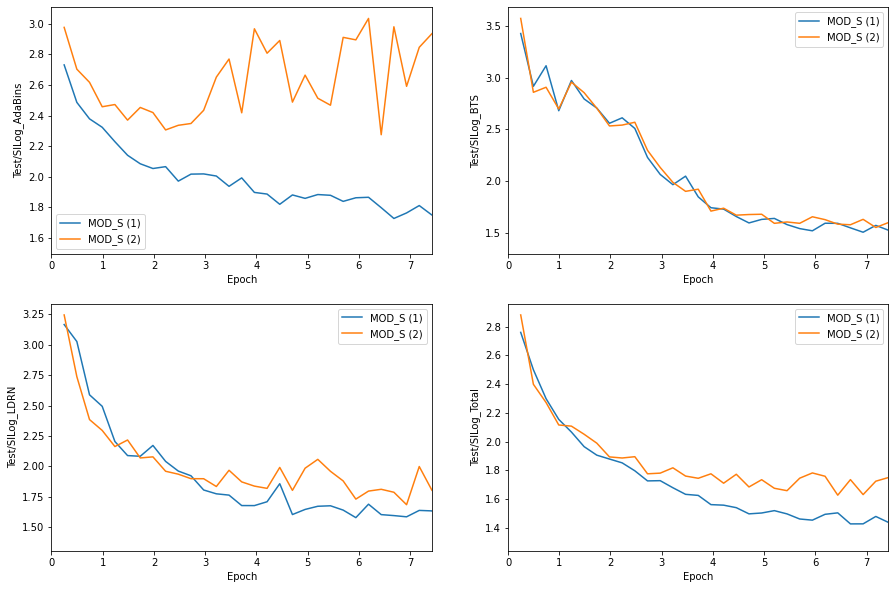

In [ ]:
filenames = ["./wandb-info/MOD_S_CONVERGE_val.csv", "./wandb-info/MOD_S_NOT-CONVERGE_val.csv"]
criteria = ["Test/SILog_AdaBins", "Test/SILog_BTS", "Test/SILog_LDRN", "Test/SILog_Total"]
labels = ["MOD_S (1)", "MOD_S (2)"]
step_per_epoch = [808, 808]
outfile = "MOD_S"
compare(filenames, criteria, labels, step_per_epoch, outfile)

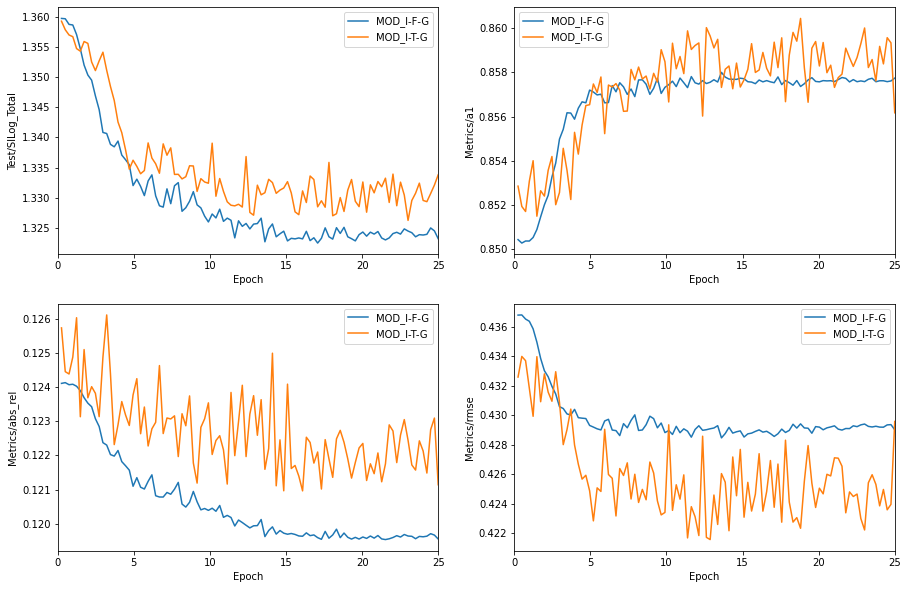

In [ ]:
filenames = ["./wandb-info/MOD_I-F-G_val.csv", "./wandb-info/MOD_I-T-G_val.csv"]
criteria = ["Test/SILog_Total", "Metrics/a1", "Metrics/abs_rel", "Metrics/rmse"]
labels = ["MOD_I-F-G", "MOD_I-T-G"]
step_per_epoch = [808, 808]
outfile = "MOD_I-T-G"
compare(filenames, criteria, labels, step_per_epoch, outfile)

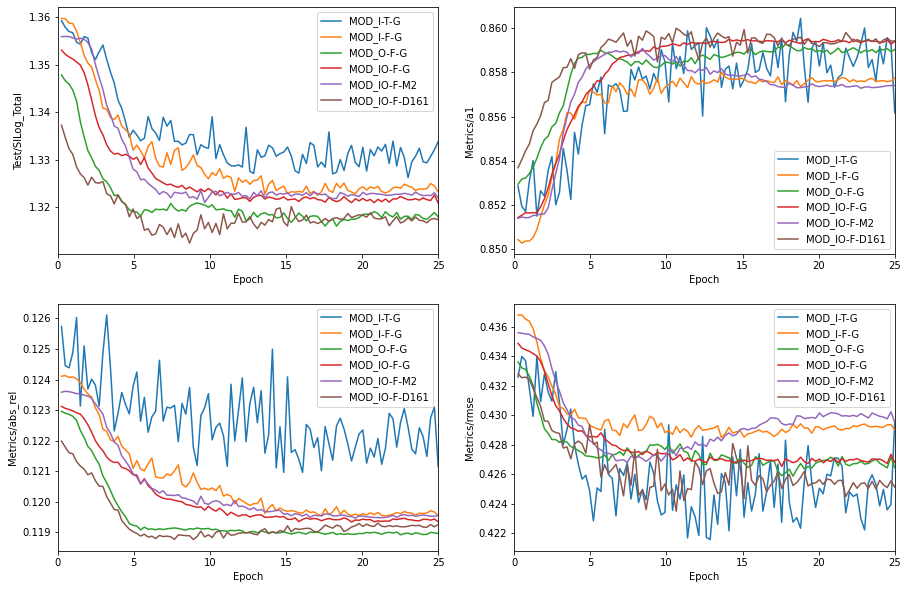

In [ ]:
filenames = ["./wandb-info/MOD_I-T-G_val.csv", 
             "./wandb-info/MOD_I-F-G_val.csv", 
             "./wandb-info/MOD_O-F-G_val.csv",
             "./wandb-info/MOD_IO-F-G_val.csv",
             "./wandb-info/MOD_IO-F-M2_val.csv",
             "./wandb-info/MOD_IO-F-D161_val.csv",
             ]
criteria = ["Test/SILog_Total", "Metrics/a1", "Metrics/abs_rel", "Metrics/rmse"]
labels = ["MOD_I-T-G", "MOD_I-F-G", "MOD_O-F-G", "MOD_IO-F-G", "MOD_IO-F-M2", "MOD_IO-F-D161"]
step_per_epoch = [808, 808, 808, 808, 808, 2424]
outfile = "MOD"
compare(filenames, criteria, labels, step_per_epoch, outfile)

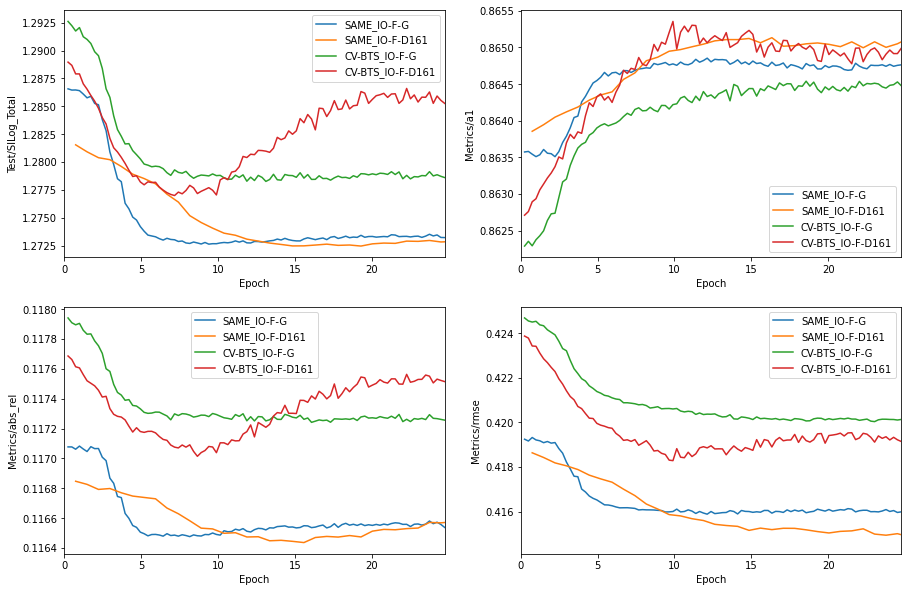

In [ ]:
filenames = ["./wandb-info/SAME_IO-F-G_val.csv",
             "./wandb-info/SAME_IO-F-D161_val.csv",
             "./wandb-info/CV-BTS_IO-F-G_val.csv",
             "./wandb-info/CV-BTS_IO-F-D161_val.csv",
             ]
criteria = ["Test/SILog_Total", "Metrics/a1", "Metrics/abs_rel", "Metrics/rmse"]
labels = ["SAME_IO-F-G", "SAME_IO-F-D161",
"CV-BTS_IO-F-G", "CV-BTS_IO-F-D161",
]
step_per_epoch = [2424, 808, 2424, 2424]
outfile = "BTS"
compare(filenames, criteria, labels, step_per_epoch, outfile)

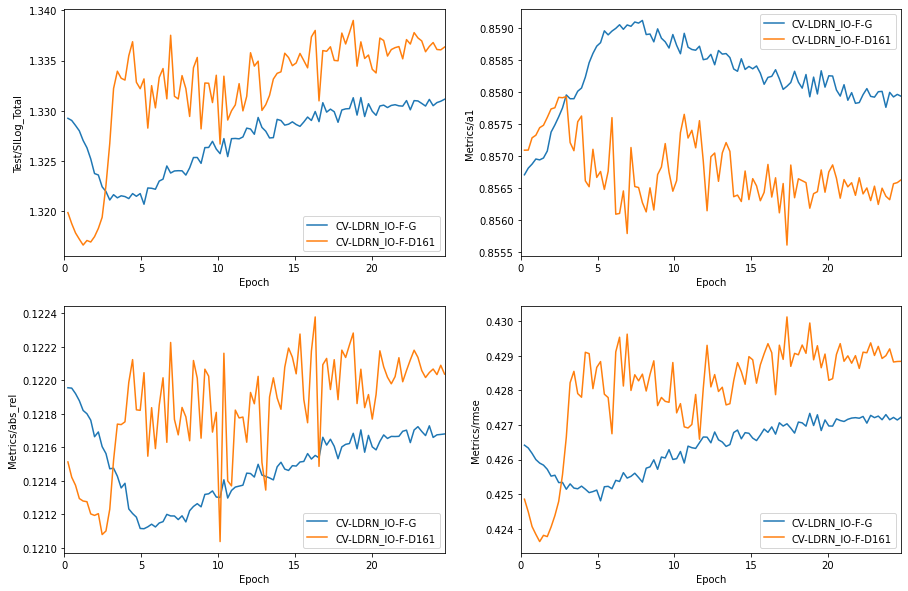

In [ ]:
filenames = ["./wandb-info/CV-LDRN_IO-F-G_val.csv",
             "./wandb-info/CV-LDRN_IO-F-D161_val.csv",
             ]
criteria = ["Test/SILog_Total", "Metrics/a1", "Metrics/abs_rel", "Metrics/rmse"]
labels = ["CV-LDRN_IO-F-G", "CV-LDRN_IO-F-D161",]
step_per_epoch = [2424, 2424]
outfile = "LDRN"
compare(filenames, criteria, labels, step_per_epoch, outfile)

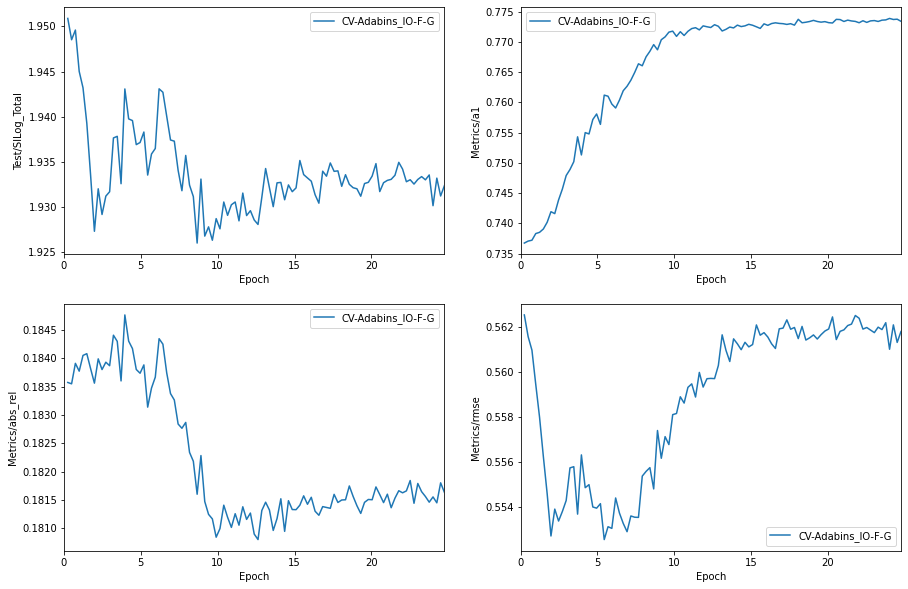

In [ ]:
filenames = ["./wandb-info/CV-adabins_IO-F-G_val.csv",
             ]
criteria = ["Test/SILog_Total", "Metrics/a1", "Metrics/abs_rel", "Metrics/rmse"]
labels = ["CV-Adabins_IO-F-G",]
step_per_epoch = [2424]
outfile = "Adabins"

compare(filenames, criteria, labels, step_per_epoch, outfile)

In [ ]:
from google.colab import files
! zip -r /content/result-graph.zip /content/graph
files.download("/content/result-graph.zip")

updating: content/graph/ (stored 0%)
updating: content/graph/MOD_I-T-G.pdf (deflated 20%)
updating: content/graph/BTS.pdf (deflated 17%)
updating: content/graph/MOD_S.pdf (deflated 25%)
updating: content/graph/LDRN.pdf (deflated 21%)
updating: content/graph/MOD.pdf (deflated 14%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>